# Fasttext

In [1]:
import pandas as pd

In [2]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

In [4]:
address = 'your_path\wiki-news-300d-1M.vec'

In [5]:
data = load_vectors('your_path\wiki-news-300d-1M.vec')

FileNotFoundError: [Errno 2] No such file or directory: 'your_path\\wiki-news-300d-1M.vec'

In [6]:
from __future__ import print_function
from gensim.models import KeyedVectors

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [15]:
# Creating the model
en_model = KeyedVectors.load_word2vec_format(address)

In [16]:
# Getting the tokens 
words = []
for word in en_model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

Number of Tokens: 999994


In [17]:
# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(en_model[words[0]])
))

Dimension of a word vector: 300


In [18]:
# Print out the vector of a word 
print("Vector components of a word: {}".format(
    en_model[words[0]]
))

Vector components of a word: [ 1.0730e-01  8.9000e-03  6.0000e-04  5.5000e-03 -6.4600e-02 -6.0000e-02
  4.5000e-02 -1.3300e-02 -3.5700e-02  4.3000e-02 -3.5600e-02 -3.2000e-03
  7.3000e-03 -1.0000e-04  2.5800e-02 -1.6600e-02  7.5000e-03  6.8600e-02
  3.9200e-02  7.5300e-02  1.1500e-02 -8.7000e-03  4.2100e-02  2.6500e-02
 -6.0100e-02  2.4200e-01  1.9900e-02 -7.3900e-02 -3.1000e-03 -2.6300e-02
 -6.2000e-03  1.6800e-02 -3.5700e-02 -2.4900e-02  1.9000e-02 -1.8400e-02
 -5.3700e-02  1.4200e-01  6.0000e-02  2.2600e-02 -3.8000e-03 -6.7500e-02
 -3.6000e-03 -8.0000e-03  5.7000e-02  2.0800e-02  2.2300e-02 -2.5600e-02
 -1.5300e-02  2.2000e-03 -4.8200e-02  1.3100e-02 -6.0160e-01 -8.8000e-03
  1.0600e-02  2.2900e-02  3.3600e-02  7.1000e-03  8.8700e-02  2.3700e-02
 -2.9000e-02 -4.0500e-02 -1.2500e-02  1.4700e-02  4.7500e-02  6.4700e-02
  4.7400e-02  1.9900e-02  4.0800e-02  3.2200e-02  3.6000e-03  3.5000e-02
 -7.2300e-02 -3.0500e-02  1.8400e-02 -2.6000e-03  2.4000e-02 -1.6000e-02
 -3.0800e-02  4.3400e-

In [21]:
# Pick a word 
find_similar_to = 'Jesus'

# Finding out similar words [default= top 10]
for similar_word in en_model.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
))

Word: Christ, Similarity: 0.80
Word: Chirst, Similarity: 0.70
Word: jesus, Similarity: 0.69
Word: Yeshua, Similarity: 0.69
Word: Jesus-, Similarity: 0.68
Word: Nazereth, Similarity: 0.65
Word: crucifiction, Similarity: 0.65
Word: Jesus., Similarity: 0.64
Word: messiahship, Similarity: 0.64
Word: Nazareth, Similarity: 0.64


In [20]:
# Test words 
word_add = ['dhaka', 'india']
word_sub = ['bangladesh']

# Word vector addition and subtraction 
for resultant_word in en_model.most_similar(
    positive=word_add, negative=word_sub
):
    print("Word : {0} , Similarity: {1:.2f}".format(
        resultant_word[0], resultant_word[1]
))

Word : delhi , Similarity: 0.68
Word : maharastra , Similarity: 0.68
Word : patiala , Similarity: 0.68
Word : meerut , Similarity: 0.67
Word : banglore , Similarity: 0.67
Word : lucknow , Similarity: 0.67
Word : ludhiana , Similarity: 0.67
Word : vijayawada , Similarity: 0.67
Word : patna , Similarity: 0.67
Word : odisha , Similarity: 0.67


In [22]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

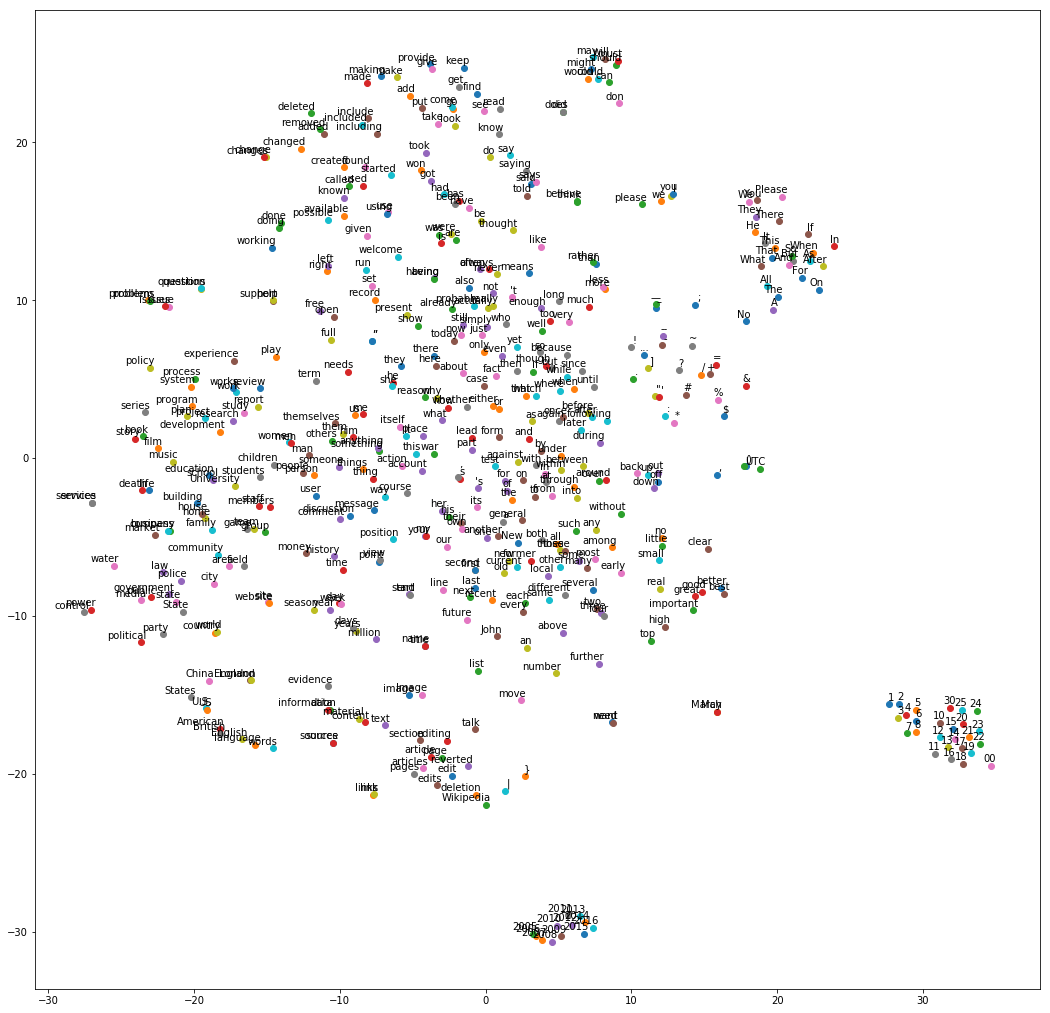

In [23]:
# Limit number of tokens to be visualized
limit = 500
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in en_model.vocab:
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, en_model[word])

    i += 1

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)